In [ ]:
#Importation des bibliothèques utiles
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize

###I-Problème de minimisation sans contraintes

Visualisation de la courbe de $J_{n}$ dans les conditions suivantes:
*   n=2
*   f(x)=1, pour $\forall x \in \mathbb{R}^{n}$ 




In [ ]:
#Implémentation d'une fct choix f=1 
f_neutre = lambda x:1

#n=2
#Définition de la matrice A
A=np.array([[2,-1],[-1,2]])
A
def J2(x,y,f=f_neutre):
  return((x**2+y**2+(x-y)**2)*4.5-x*f(1/3)-y*f(2/3))
  #return 0.5*np.dot(np.dot(A,u),u)-np.dot(b,u)

def nabla_J2(x,y,f=f_neutre):
  #return np.array([53*x/3-9*y,-9*x+52*y/3])
  return np.array([  18*x -9*y -f(1/3) , -9*x + 18*y -f(2/3)  ])

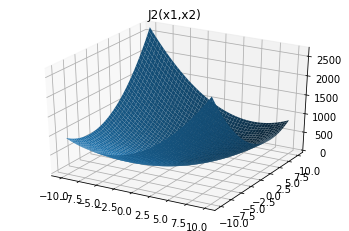

In [ ]:
# defining all 3 axes
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y, sparse=True,indexing='ij')
z = J2(X,Y)

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
ax.plot_surface(X,Y,z)
ax.set_title('J2(x1,x2)')
plt.show()

#On obtient une courbe convexe! OK

On note $A_{n}$ la matrice de la même façon que A en dimension n. \\
Vérifions numériquement que $A_{n} \in S_{n}^{++}(\mathbb{R})$ pour quelques valeurs de n.




In [ ]:
#Constrution de la matrice An (A en dimension n)
def constructeur_A(n):
  A=(2*np.eye(n)-np.eye(n,k=1)-np.eye(n,k=-1))*((n+1)**2)
  return A

#Définition du test d'appartenance à Sn++(R)
def sym_def_pos (A):
  return (min(np.linalg.eigvals(A))>0)&((A==A.transpose()).all())

#Définition de la matrice bn (b en dimension n)
def constructeur_b(n,f=f_neutre):
  h=1/(n+1)
  bn=h*np.arange(1,n+1)
  bn=[f(e) for e in bn]
  return(bn)

#Définition de la fonction Jn
def Jn(u,f=f_neutre):
  n=np.shape(u)[0]
  An=constructeur_A(n)
  bn=constructeur_b(n,f)
  Jn=0.5*np.dot(np.dot(An,u),u)-np.dot(bn,u)
  return(Jn)

#Définition du gradient de la fonction Jn
def nabla_Jn(u,f=f_neutre):
  n=np.shape(u)[0]
  An=constructeur_A(n)
  bn=constructeur_b(n,f)
  nabla_Jn=np.dot(An,u)-bn
  return(nabla_Jn)

In [ ]:
b=constructeur_b(2)
b

[1, 1]

In [ ]:
A2=constructeur_A(2)
print(sym_def_pos (A2))

A5=constructeur_A(5)
print(sym_def_pos (A5))

A10=constructeur_A(10)
print(sym_def_pos (A10))

True
True
True


On cherche à minimiser le problème (4) par les méthodes du gradient, à savoir la méthode du gradient à pas fixe, la méthode du gradient à pas optimal et la méthode du gradient conjugué. \\
On se place dans les conditions suivantes:

*   $n=2$
*   $tol=10^{-6}$
*   $u^{0}=[-1,2]^{T}$
*   $\rho =0.1$

######Méthode du gradient à pas fixe




In [ ]:
#Initialisation des paramètres globaux
n=2
tol=10**-6
u0=np.array([-1,2])
rho=0.1
max_iter=1000
J2(4,5)


180.0

In [ ]:
def grad_pas_fixe(tol,u0,rho,max_iter,f=f_neutre):
  k=0
  suite=[]
  taille=np.shape(u0)[0]
  if (rho>=2/max(np.linalg.eigvals(constructeur_A(taille))))|(rho<=0):
    rho=1/max(np.linalg.eigvals(constructeur_A(taille))) #0.5*pas limite
    print("\nVotre pas {} n'appartient pas à l'intervalle ]0,{}[.\nIl n'assure pas la convergence de la méthode du gradient à pas fixe.\nIl sera remplacé automatiquement et exclusivement pour le GPF par {}.\nMerci de votre compréhension".format(rho,2/max(np.linalg.eigvals(constructeur_A(taille))),1/max(np.linalg.eigvals(constructeur_A(taille)))))
  rk=rho
  uk=u0
  suite.append(uk)
  while (rk>=tol)&(k<max_iter):
    k+=1
    dk=-nabla_Jn(uk,f)
    uk=uk+rho*dk
    rk=np.linalg.norm(rho*dk)
    suite.append(uk)
    
  return(suite)

######Méthode du gradient à pas optimal




In [ ]:
def aux (u,d,a):
  return(Jn(u+a*d))


def section_doree(tol,u,d,a,b):
  phi=(1+np.sqrt(5))/2
  err=b-a
  k=0
  while err>=tol:
    a_new=a+(b-a)/(phi**2)
    b_new=a+(b-a)/phi
    if aux(u,d,a_new)>aux(u,d,b_new):
      a=a_new
    elif aux(u,d,a_new)<aux(u,d,b_new):
      b=b_new
    else:
      a=a_new
      b=b_new
    err=b-a
    k+=1
  return (a+b)/2


#Définition de la fonction Jn_red
def Jn_red(u):
  n=np.shape(u)[0]
  An=constructeur_A(n)
  Jn_red=np.dot(np.dot(An,u),u)
  return(Jn_red)



def grad_pas_optimal_avec_section_doree(tol,u0,rho,max_iter,f=f_neutre):
  k=0
  suite=[]
  rk=rho
  uk=u0
  suite.append(uk)
  a=-1000
  b=1000
  while (rk>=tol)&(k<max_iter):
    k+=1
    dk=-nabla_Jn(uk,f)
    rhok=section_doree(tol,uk,dk,a,b)
    uk=uk+rhok*dk
    rk=np.linalg.norm(rho*dk)
    suite.append(uk)
  return(suite)

def grad_pas_optimal_theo(tol,u0,rho,max_iter,f=f_neutre):
  k=0
  suite=[]
  rk=rho
  uk=u0
  suite.append(uk)
  a=-1000
  b=1000
  while (rk>=tol)&(k<max_iter):
    k+=1
    dk=-nabla_Jn(uk,f)
    rhok=np.linalg.norm(dk)**2/Jn_red(dk)
    uk=uk+rhok*dk
    rk=np.linalg.norm(rho*dk)
    suite.append(uk)
    
  return(suite)




######Méthode du gradient à pas conjugué




In [ ]:

def grad_pas_conjugué(tol,u0,rho,max_iter,f=f_neutre):
  k=0
  suite=[]
  mk=tol
  rk=nabla_Jn(u0,f)
  dk=-rk
  uk=u0
  suite.append(uk)
  while (mk>=tol)&(k<max_iter):
    k+=1
    rhok=-(np.dot(rk,dk))/Jn_red(dk)
    uk=uk+rhok*dk
    aux_rk=nabla_Jn(uk,f)
    bk=(np.linalg.norm(aux_rk)/np.linalg.norm(rk))**2
    dk=-aux_rk+bk*dk
    rk=aux_rk
    mk=np.linalg.norm(rhok*dk)
    suite.append(uk)
    
  return(suite)

#####Visualisation graphique


*   des lignes de niveau de $J_2$
*   de $∇J_{2}$
*   des suites construites par les différentes méthodes du gradient (à pas fixe, à pas optimal, et à pas conjugué).






2440.0
0.0

Votre pas 0.037037037037037035 n'appartient pas à l'intervalle ]0,0.07407407407407407[.
Il n'assure pas la convergence de la méthode du gradient à pas fixe.
Il sera remplacé automatiquement et exclusivement pour le GPF par 0.037037037037037035.
Merci de votre compréhension


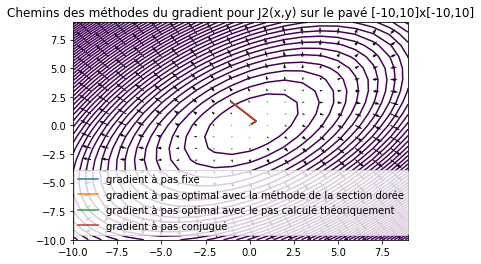

In [ ]:
# Définition des 3 axes
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x, y,indexing='ij')

#Evaluation de J2 et de son gradient
z = J2(X,Y)
nabla_z=nabla_J2(X,Y)



#Définition des tangentes
x_dir=nabla_z[0,:,:]
y_dir=nabla_z[1,:,:]


#Définition des lignes de niveaux
M,m=np.max(z),np.min(z)
print(M)
print(m)
m=int(m)+1
M=int(M)+1
L=list(range(int(m),int(M)+1))
#L=np.linspace(m,(M-m)/50,M)
L=[float(e)for e in L]
#Bloc de test des méthodes du gradient
#suite_sol=grad_pas_fixe(tol,u0,rho,max_iter)
#abs=[e[0] for e in suite_sol]
#ord=[e[1] for e in suite_sol]
#plt.plot(abs,ord)
#rho=0.05

suites=[grad_pas_fixe(tol,u0,rho,max_iter),grad_pas_optimal_avec_section_doree(tol,u0,rho,max_iter),grad_pas_optimal_theo(tol,u0,rho,max_iter),grad_pas_conjugué(tol,u0,rho,max_iter)]
coor=[([e[0] for e in suites[i]],[e[1] for e in suites[i]]) for i in range(4)] #list((liste X du gradient évoqué,liste Y du gradient évoquée) for type méthode du gradient)

labels=['gradient à pas fixe', 'gradient à pas optimal avec la méthode de la section dorée','gradient à pas optimal avec le pas calculé théoriquement', 'gradient à pas conjugué']

#Changement d'échelle
z=z/50

#Plotting
ax=plt.axes()
plt.contour(X,Y,z,levels=L)
plt.quiver(X,Y,x_dir,y_dir,scale=5000)

#for i in range(3,-1,-1):
for i in range(4):
 plt.plot(coor[i][0],coor[i][1],label=labels[i])
 
ax.set_title('Chemins des méthodes du gradient pour J2(x,y) sur le pavé [-10,10]x[-10,10]')
plt.legend()
plt.show()

#####Calcul théorique du minimum de J2

In [ ]:
A2=constructeur_A(2)
b2=constructeur_b(2)
u=np.linalg.solve(A2,b2)
print(u)

[0.11111111 0.11111111]


Test des méthodes du gradient pour des dimensions plus grandes

In [ ]:
def test_gradient(n,tol,rho,max_iter,f=f_neutre):
  u0=np.ones(n)
  start=[0 for i in range(4)]
  end=[0 for i in range(4)]

  start[0]=time.time()
  s1=grad_pas_fixe(tol,u0,rho,max_iter,f)
  end[0]=time.time()

  start[1]=time.time()
  s2=grad_pas_optimal_avec_section_doree(tol,u0,rho,max_iter,f)
  end[1]=time.time()

  start[2]=time.time()
  s3=grad_pas_optimal_theo(tol,u0,rho,max_iter,f)
  end[2]=time.time()

  start[3]=time.time()
  s4=grad_pas_conjugué(tol,u0,rho,max_iter,f)
  end[3]=time.time()
  A=constructeur_A(n)
  b=constructeur_b(n,f)
  sol_th=np.linalg.solve(A,b)
  suites=[s1,s2,s3,s4]
  sols_app=["approximation retournée"]+[suites[i][-1]for i in range(4)]
  ecart=["Ecart à l'idéalité"]+[np.linalg.norm(sol_th-sols_app[i]) for i in range(1,5)]
  nbre_iterations=["nbre_iterations"]+[len(e)-1 for e in suites]                       #len -1 pour ne pas compter u0
  nb_max_iter_atteint=["max_iter atteint? "]+[len(e)-1==max_iter for e in suites]
  temps_de_calcul=["temps de calcul"]+[round(end[i]-start[i],5) for i in range(4)]
  M=np.array([["Méthode du gradient","GP Fixe","GP Optimal approché","GP Optimal théorique","GP Conjugué"],ecart,nbre_iterations,nb_max_iter_atteint,temps_de_calcul])
  return M

In [ ]:
N=[2,3,10,15,17,18,19,20,30,50,100]
for n in N:
  M=test_gradient(n,tol,rho,max_iter)
  print("=======================================================================")
  print("                              n={}                                     ".format(n))
  print("=======================================================================")
  print(M)
  


Votre pas 0.037037037037037035 n'appartient pas à l'intervalle ]0,0.07407407407407407[.
Il n'assure pas la convergence de la méthode du gradient à pas fixe.
Il sera remplacé automatiquement et exclusivement pour le GPF par 0.037037037037037035.
Merci de votre compréhension
                              n=2                                     
[['Méthode du gradient' 'GP Fixe' 'GP Optimal approché'
  'GP Optimal théorique' 'GP Conjugué']
 ["Ecart à l'idéalité" '1.9424548213931825e-06' '6.619725693523865e-11'
  '0.0' '7.850462293418876e-17']
 ['nbre_iterations' '33' '3' '2' '1']
 ['max_iter atteint? ' 'False' 'False' 'False' 'False']
 ['temps de calcul' '0.00533' '0.02747' '0.00021' '0.00428']]

Votre pas 0.0183058261758408 n'appartient pas à l'intervalle ]0,0.0366116523516816[.
Il n'assure pas la convergence de la méthode du gradient à pas fixe.
Il sera remplacé automatiquement et exclusivement pour le GPF par 0.0183058261758408.
Merci de votre compréhension
                           

In [ ]:
#print(J2(4,5))
#u=np.array([4,5])
#print(Jn(u))
#nabla_J2(4,5)


###II-Problème de minimisation sous contraintes



##### Résolution du problème de minimisation sous contraintes avec scipi.optimize.minimize. dans les conditions suivantes:


*   $n=100$
*   $f(x)=1$
*   $g(x)=max(1.5-20(x-0.6),0)$



In [ ]:
#Implémentation de f
f = lambda x:(np.pi**2)*np.sin(np.pi*x)

#Implémentation de g
g= lambda x:max(1.5-20*(x-0.6)**2,0)

#Implémentation de la fonction Identité
Id=lambda x:x

In [ ]:

def sol_th_ss_contraintes(n,f=f_neutre):
    x = np. linspace (0 , 1 , n + 2) 
    xv = x [1: -1] 
    fv , gv = np.array([f(e) for e in xv]) , np.array([g(e) for e in xv])
    #np.array([f(e) for e in xv])
    u = np. zeros (n) 
    Jf = lambda u : Jn(u,f) 
    DJf = lambda u : nabla_Jn(u,f) 
    const = ({'type': 'ineq', 'fun' : lambda u : u - gv , 'jac' : lambda u : np. eye(np.size(u))}) 
    res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000}) 
    # res.x contient la solution 
    return (res.x)

<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})
<ipython-input-18-00941d998dfc>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0.5, 1.0, 'Solution théorique du problème sous contraintes')

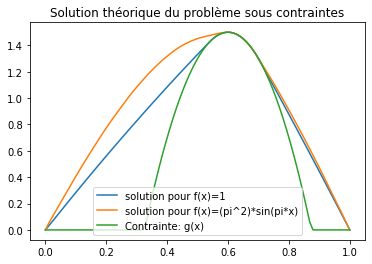

In [ ]:
n=90
s1=sol_th_ss_contraintes(n)
s2=sol_th_ss_contraintes(n,f)
s1=[0]+list(s1)+[0]
s2=[0]+list(s2)+[0]
h=1/(n+1)
X=[i*h for i in range (0,n+2)]
G=[g(e) for e in X]
#gn=np.array([g(i*h) for i in X])
plt.plot(X,s1,label="solution pour f(x)=1")
plt.plot(X,s2,label="solution pour f(x)=(pi^2)*sin(pi*x)")
plt.plot(X,G,label="Contrainte: g(x)")
plt.legend()
ax=plt.axes()
ax.set_title("Solution théorique du problème sous contraintes")

In [ ]:
sol_th1=sol_th_ss_contraintes(20)
sol_th2=sol_th_ss_contraintes(20,f)
#print(sol_th1-sol_th2)
print(Jn(sol_th1))
print(Jn(sol_th2))
np.linalg.norm(sol_th1-sol_th2)
#Après avoir exécuté cette cellule sur plusieurs valeurs dim, on constate que cette modification de fonctions n'a approximativement pas trop décalé la solution supposée théorique.
#On s'attend ainsi à ce que les méthodes numériques, si bien construites, n'en génèreront pas!

87.84599618896014
95.04038297783694


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


0.6395143902931444

#####Définition de l'opérateur de projection $P_{K_n}$

In [ ]:
def projection_k_n(u,gn):
  return np.array([max(u[i],gn[i]) for i in range(np.shape(u)[0])])

In [ ]:
def gradient_projete_pas_fixe (Jf, DJf , gn , u0 , rho , Tol , iterMax , store=1 ,f=f_neutre):
  #Initialisation  
  k=0
  rk=Tol
  uk=u0
  suite=[]
  suite.append(uk)
  #Boucle 
  while (rk>=Tol)&(k<iterMax):
    k+=1
    wk=-DJf(uk,f)
    uk_new=projection_k_n(uk+rho*wk,gn)
    rk=np.linalg.norm(uk_new-uk)
    uk=uk_new
    suite.append(uk)
    #print(rk)
  #Output
  iter=k
  if store==0:
    suite=suite[-1]
  return(iter,suite)

#####Visualisation de la méthode du gradient projeté à pas fixe pour:

*   n=2
*   $u_{0}$=(8,4)
*   $\rho$=0.1
*   Tol=$10^{-5}$ 

In [ ]:
def chemin_cvg_grad_proj_pas_fixe(f=f_neutre):
    # Définition des 3 axes
    x = np.arange(-10, 10, 1)
    y = np.arange(-10, 10, 1)
    X, Y = np.meshgrid(x, y,indexing='ij')

    #Evaluation de J2 et de son gradient
    z = J2(X,Y)
    nabla_z=nabla_J2(X,Y)



    #Définition des tangentes
    x_dir=nabla_z[0,:,:]
    y_dir=nabla_z[1,:,:]


    #Définition des lignes de niveaux
    M,m=np.max(z),np.min(z)
    print(M)
    print(m)
    m=int(m)+1
    M=int(M)+1
    L=list(range(int(m),int(M)+1))


    #Initialisation du méthode du gradient projeté à pas fixe
    n=2
    u0=np.array([8,4])
    rho=0.1
    Tol=10**(-5)
    h=1/(n+1)
    gn=np.array([g(i*h) for i in range(1,n+1)])
    iterMax=1000


    #Appel de la méthode
    iter,s=gradient_projete_pas_fixe (Jn, nabla_Jn , gn , u0 , rho , Tol , iterMax,f)

    #Récupération du chemin engendré par la méthode
    coor=[ [e[0] for e in s], [e[1] for e in s]  ]

    #Evaluation de la méthode
    sol_th=sol_th_ss_contraintes(2,f)
    sol_app=s[-1]
    print(s[-1],Jn(s[-1]))
    print(sol_th,Jn(sol_th))
    erreur=np.linalg.norm(sol_th-sol_app)
    print("erreur= ",erreur)

    #Changement d'échelle
    z=z/50



    #Plotting
    ax=plt.axes()
    plt.contour(X,Y,z,levels=L)
    plt.quiver(X,Y,x_dir,y_dir,scale=5000)
    plt.plot(coor[0],coor[1],label="Gradient Projeté à Pas Fixe")
    ax.set_title('Chemin du gradient projeté pour J2(x,y) sur le pavé [-10,10]x[-10,10]')
    plt.legend()
    print("nbre d'itérations= ",iter)
    plt.show()



<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


2440.0
0.0
[0.76110712 1.41111111] 11.296388889032514
[0.76111111 1.41111111] 11.296388888888895
erreur=  3.994771142101783e-06
nbre d'itérations=  59


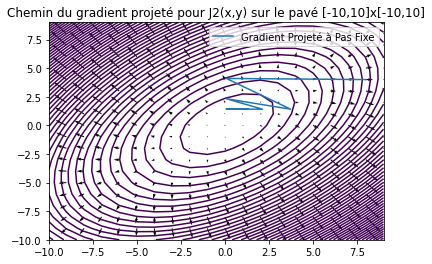

In [ ]:
chemin_cvg_grad_proj_pas_fixe()

#####Test de la convergence de la méthode du Gradient Projeté à Pas Fixe pour les dimensions supérieures $n=2,5,20,50,100$ en fct du Pas Fixe $\rho=$0.1, 0.5, 1



In [ ]:
def test_cvg_fct_pas(list_pas,f=f_neutre):
  for rho in list_pas:   
    #Rappel des paramètres communs
    Tol=10**(-5)
    iterMax=1000
    #rho=? défini par la boucle for
    #n=? 
    #u0? (choisi aléatoirement suivant la dimension n)
    #gn? à définir en fct de la dim n

    #Dimensions tests
    N=[2,5,20,50,100]
    vals=[]
    #Affichage des nombres d'itération pour chaque valeur de n: En cas de convergence, on aurait iter<iterMax
    for j in N:
      #u0=np.ones(j)
      h=1/(j+1)
      X=[i*h for i in range (0,j+2)]
      G=[g(e) for e in X]
      u0=gn=np.array([g(i*h) for i in range(1,j+1)])
      start=time.time()
      iter,s=gradient_projete_pas_fixe (Jn, nabla_Jn , gn , u0 , rho , Tol , iterMax,f)
      end=time.time()
      temps_calcul=end-start
      sol_th=sol_th_ss_contraintes(j,f)
      sol_app=s[-1]
      #print(s[10])
      erreur=np.linalg.norm(sol_th-sol_app)
      vals.append(["n={}  ".format(j),"{}/{} itérations".format(iter,iterMax),erreur,np.round(temps_calcul,5),(iter<iterMax)&(erreur<np.linalg.norm(sol_th-u0))])
      if (iter<iterMax)&(erreur<np.linalg.norm(sol_th-u0)):
        J=[0]+list(sol_app)+[0]
        plt.plot(X,J,label='Un, n={}'.format(j))
        plt.plot(X,G,label='Gn, n={}'.format(j))
    vals.insert(0,["dim n","Nombre d'itérations","erreur","temps de calcul","Convergence?"])
    #vals=[[" dim n","nbre itérations"],vals]
    M=np.array(vals)
    print("=======================================================================")
    print("                              pas={}                                     ".format(rho))
    print("=======================================================================")
    print(M)
    plt.legend()
    ax=plt.axes()
    ax.set_title("Solution par pénalisation en cas de convergence (Les sols explosives ne sont pas représentées)")
  #return() méthode d'affichage ne nécéssite pas un return



<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                              pas=0.1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '54/1000 itérations' '3.994771142101783e-06' '0.00294' 'True']
 ['n=5  ' '389/1000 itérations' 'nan' '0.01905' 'False']
 ['n=20  ' '161/1000 itérations' 'nan' '0.00618' 'False']
 ['n=50  ' '115/1000 itérations' 'nan' '0.00657' 'False']
 ['n=100  ' '95/1000 itérations' 'nan' '0.03438' 'False']]


<ipython-input-24-d1266ad7c8b8>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()
<ipython-input-21-3b9ebfda5ee9>:12: RuntimeWarning: invalid value encountered in add
  uk_new=projection_k_n(uk+rho*wk,gn)


                              pas=0.5                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '473/1000 itérations' 'nan' '0.02126' 'False']
 ['n=5  ' '208/1000 itérations' 'nan' '0.014' 'False']
 ['n=20  ' '119/1000 itérations' 'nan' '0.00721' 'False']
 ['n=50  ' '92/1000 itérations' 'nan' '0.00844' 'False']
 ['n=100  ' '79/1000 itérations' 'nan' '0.01232' 'False']]
                              pas=1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '324/1000 itérations' 'nan' '0.01381' 'False']
 ['n=5  ' '174/1000 itérations' 'nan' '0.00801' 'False']
 ['n=20  ' '107/1000 itérations' 'nan' '0.00706' 'False']
 ['n=50  ' '85/1000 itérations' 'nan' '0.00786' 'False']
 ['n=100  ' '73/1000 itérations' 'nan' '0.01125' 'False']]


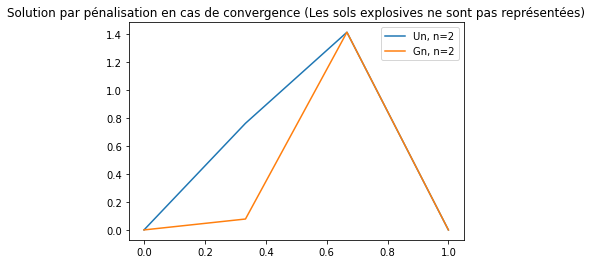

In [ ]:
list_pas=[0.1,0.5,1]
test_cvg_fct_pas(list_pas)

In [ ]:
g(0),g(1)

(0, 0)

##### Replay du test de la méthode du Gradient Projeté à Pas Fixe avec le pas optimal $\rho=\frac{2}{\lambda_{1}+\lambda_{n}}$

In [ ]:
def chemin_cvg_grad_proj_pas_opt(f=f_neutre):    
    # Définition des 3 axes
    x = np.arange(-10, 10, 1)
    y = np.arange(-10, 10, 1)
    X, Y = np.meshgrid(x, y,indexing='ij')

    #Evaluation de J2 et de son gradient
    z = J2(X,Y,f)
    nabla_z=nabla_J2(X,Y,f)



    #Définition des tangentes
    x_dir=nabla_z[0,:,:]
    y_dir=nabla_z[1,:,:]


    #Définition des lignes de niveaux
    M,m=np.max(z),np.min(z)
    print(M)
    print(m)
    m=int(m)+1
    M=int(M)+1
    L=list(range(int(m),int(M)+1))


    #Initialisation du méthode du gradient projeté à pas fixe
    n=2
    u0=np.array([8,4])
    Tol=10**(-5)
    h=1/(n+1)
    #gn=h*np.arange(1,n+1)
    #gn=np.array([ g(e) for e in gn])
    gn=np.array([g(i*h) for i in range(1,n+1)])
    iterMax=1000
    #Construction du pas optimal
    A=constructeur_A(n)
    lambda_1=min(np.linalg.eigvals(A))
    lambda_n=max(np.linalg.eigvals(A))
    rho=2/(lambda_1+lambda_n)




    #Appel de la méthode
    iter,s=gradient_projete_pas_fixe (Jn, nabla_Jn , gn , u0 , rho , Tol , iterMax,f)

    #Récupération du chemin engendré par la méthode
    coor=[ [e[0] for e in s], [e[1] for e in s]  ]

    #Evaluation de la méthode
    sol_th=sol_th_ss_contraintes(2)
    sol_app=s[-1]
    erreur=np.linalg.norm(sol_th-sol_app)
    print("erreur= ",erreur)

    #Changement d'échelle
    z=z/50



    #Plotting
    ax=plt.axes()
    plt.contour(X,Y,z,levels=L)
    plt.quiver(X,Y,x_dir,y_dir,scale=5000)
    labels=["Gradient Projeté à Pas Fixe"]
    plt.plot(coor[0],coor[1],label="Gradient Projeté à Pas Fixe")
    ax.set_title('Chemin du gradient projeté optimal J2(x,y) sur le pavé [-10,10]x[-10,10]')
    plt.legend()
    print("nbre d'itérations= ",iter)
    plt.show()



In [ ]:
def test_cvg_grad_proj_pas_opt(f=f_neutre):
    #Dimensions tests
    Tol=10**(-5)
    iterMax=1000
    N=[2,5,20,50,100]


    #Affichage des nombres d'itération pour chaque valeur de n: En cas de convergence, on aurait iter<iterMax
    for j in N:
      vals=[]
      A=constructeur_A(j)
      lambda_1=min(np.linalg.eigvals(A))
      lambda_n=max(np.linalg.eigvals(A))
      rho=2/(lambda_1+lambda_n)
      u0=np.ones(j)
      h=1/(j+1)
      X=[i*h for i in range (0,j+2)]
      G=[g(e) for e in X]
      gn=np.array([g(i*h) for i in range(1,j+1)])
      start=time.time()
      iter,s=gradient_projete_pas_fixe (Jn, nabla_Jn , gn , u0 , rho , Tol , iterMax,f)
      end=time.time()
      temps_calcul=end-start
      sol_th=sol_th_ss_contraintes(j,f)
      sol_app=s[-1]
      erreur=np.linalg.norm(sol_th-sol_app)
      vals.append(["n={}  ".format(j),"{}/{} itérations".format(iter,iterMax),erreur,np.round(temps_calcul,5),(iter<iterMax)&(erreur<np.linalg.norm(sol_th-u0))])
      if (iter<iterMax)&(erreur<np.linalg.norm(sol_th-u0)):
        #print(np.shape(sol_app))
        J=[0]+list(sol_app)+[0]
        plt.plot(X,J,label='Un, n={}'.format(j))
        plt.plot(X,G,label='Gn, n={}'.format(j))
      vals.insert(0,["dim n","Nombre d'itérations","erreur","temps de calcul","Convergence?"])
      #vals=[[" dim n","nbre itérations"],vals]
      M=np.array(vals)
      print("=======================================================================")
      print("                       n={},pas={}                                     ".format(j,rho))
      print("=======================================================================")
      print(M)
      plt.legend()

2440.0
0.0
erreur=  2.482534153247273e-16


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


nbre d'itérations=  4


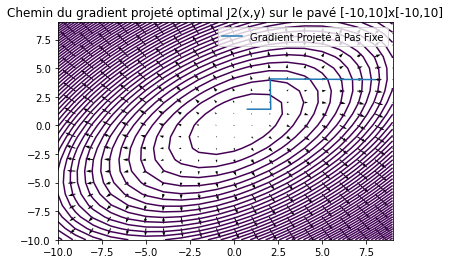

In [ ]:
chemin_cvg_grad_proj_pas_opt()

<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                       n=2,pas=0.05555555555555555                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '3/1000 itérations' '2.482534153247273e-16' '0.0002' 'True']]
                       n=5,pas=0.013888888888888895                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=5  ' '16/1000 itérations' '2.3669797039989726e-06' '0.00093' 'True']]
                       n=20,pas=0.0011337868480725622                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=20  ' '228/1000 itérations' '7.570767877436358e-05' '0.01145' 'True']]
                       n=50,pas=0.00019223375624759692                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=50  ' '1000/1000 itérations' '0.0022833039606323267' '0.05521'
  'False']]
                       n=100,pas=4.90

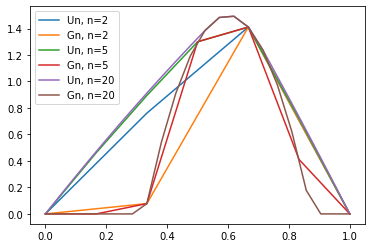

In [ ]:
test_cvg_grad_proj_pas_opt()

####Testons la méthode du gradient projeté pour $f(x)=\pi^{2}sin(\pi x)$.

2440.0
0.0
[0.76110712 1.41111111] 11.296388889032514
[0.76111111 1.41111111] 11.296388888888895
erreur=  3.994771142101783e-06


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


nbre d'itérations=  59


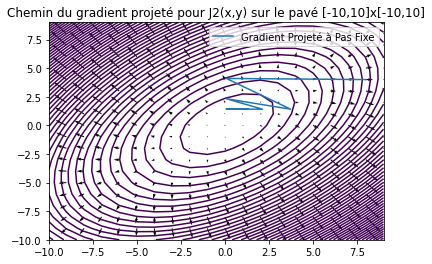

In [ ]:
chemin_cvg_grad_proj_pas_fixe()

2447.5473281366462
-8.094656273292168
erreur=  2.482534153247273e-16


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


nbre d'itérations=  4


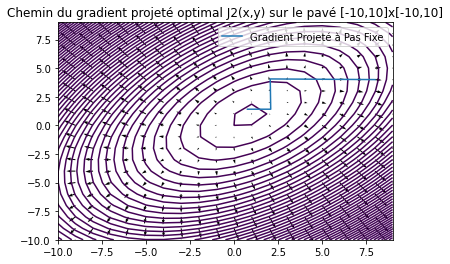

In [ ]:
chemin_cvg_grad_proj_pas_opt(f)

<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                              pas=0.1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '54/1000 itérations' '0.419300002362591' '0.0023' 'True']
 ['n=5  ' '389/1000 itérations' 'nan' '0.0165' 'False']
 ['n=20  ' '161/1000 itérations' 'nan' '0.00622' 'False']
 ['n=50  ' '115/1000 itérations' 'nan' '0.00657' 'False']
 ['n=100  ' '95/1000 itérations' 'nan' '0.0148' 'False']]


<ipython-input-24-d1266ad7c8b8>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()
<ipython-input-21-3b9ebfda5ee9>:12: RuntimeWarning: invalid value encountered in add
  uk_new=projection_k_n(uk+rho*wk,gn)


                              pas=0.5                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '473/1000 itérations' 'nan' '0.02255' 'False']
 ['n=5  ' '208/1000 itérations' 'nan' '0.01237' 'False']
 ['n=20  ' '119/1000 itérations' 'nan' '0.0079' 'False']
 ['n=50  ' '92/1000 itérations' 'nan' '0.00867' 'False']
 ['n=100  ' '79/1000 itérations' 'nan' '0.01224' 'False']]
                              pas=1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '324/1000 itérations' 'nan' '0.0141' 'False']
 ['n=5  ' '174/1000 itérations' 'nan' '0.00836' 'False']
 ['n=20  ' '107/1000 itérations' 'nan' '0.00665' 'False']
 ['n=50  ' '85/1000 itérations' 'nan' '0.00796' 'False']
 ['n=100  ' '73/1000 itérations' 'nan' '0.0114' 'False']]


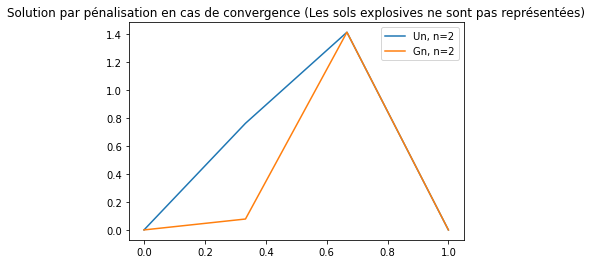

In [ ]:
list_pas=[0.1,0.5,1]
test_cvg_fct_pas(list_pas,f)

                       n=2,pas=0.05555555555555555                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '3/1000 itérations' '0.419296007591449' '0.00026' 'True']]


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                       n=5,pas=0.013888888888888895                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=5  ' '16/1000 itérations' '0.33805280367794205' '0.00055' 'True']]
                       n=20,pas=0.0011337868480725622                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=20  ' '228/1000 itérations' '0.6394412530985898' '0.0165' 'True']]
                       n=50,pas=0.00019223375624759692                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=50  ' '1000/1000 itérations' '0.9902162413521286' '0.05564' 'False']]
                       n=100,pas=4.901480247034591e-05                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=100  ' '1000/1000 itérations' '2.680512014143659' '0.1697' 'False']]


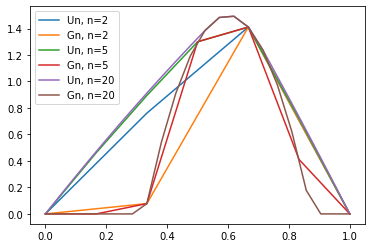

In [ ]:
test_cvg_grad_proj_pas_opt(f)

Méthode de pénalisation

In [ ]:
def sign(x):
  if x!=0:
    return x/abs(x)
  return 0

def penalite(u, gN, eta,f=f_neutre):
  return (np.array([max(e,0)**2 for e in (gN-u)]).sum())/eta


def grad_penalite(u,gN, eta,f=f_neutre):
  a=np.array([sign(gN[i]-u[i])*max(gN[i]-u[i],0) for i in range(np.shape(u)[0])])
  return -2*a/eta

def aux_bis (u,d,a,f):
      return(f(u+a*d)) 
def section_doree_bis(tol,u,d,a,b,f):
  phi=(1+np.sqrt(5))/2
  err=b-a
  k=0
  while err>=tol:
    a_new=a+(b-a)/(phi**2)
    b_new=a+(b-a)/phi
    if aux_bis(u,d,a_new,f)>aux_bis(u,d,b_new,f):
      a=a_new
    elif aux_bis(u,d,a_new,f)<aux_bis(u,d,b_new,f):
      b=b_new
    else:
      a=a_new
      b=b_new
    err=b-a
    k+=1
  return (a+b)/2

def grad_optimal_bis(tol,u0,rho,max_iter,Df,Jf=f_neutre):
    k=0
    suite=[]
    rk=rho
    uk=u0
    suite.append(uk)
    a=-5
    b=5
    while (rk>=tol)&(k<max_iter):
        k+=1
        dk=-Df(uk)
        rhok=section_doree_bis(tol,uk,dk,a,b,Jf)
        uk=uk+rhok*dk
        rk=np.linalg.norm(rhok*dk)
        suite.append(uk)
    return(k,suite)

    
      
def pénalisation(u,gN,eta,rho,tol=10**(-5),iterMax=1000,f=f_neutre,store=1):

         
          Jf = lambda u : Jn(u,f) + penalite (u, gN , eta,f) 
          DJf = lambda u :nabla_Jn(u,f) + grad_penalite (u, gN , eta) 
          taille=np.shape(u)[0]
          u=np.ones(taille)
          iter,s=grad_optimal_bis(tol,u,rho,iterMax,DJf,Jf)
                  
          return(iter,s)
   
   

<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})
<ipython-input-36-7e3c4451fcb5>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M=np.array(vals)


                                eta=1                                   
[[' dim n' 'nbre itérations']
 [list(['dim n', "Nombre d'itérations", 'temps de calcul', 'erreur', 'Convergence?'])
  list(['n=50  ', '1000/1000 itérations', 6.79971, 4.855509731201563, False])]]
                                eta=0.1                                   
[[' dim n' 'nbre itérations']
 [list(['dim n', "Nombre d'itérations", 'temps de calcul', 'erreur', 'Convergence?'])
  list(['n=50  ', '1000/1000 itérations', 6.5229, 2.629866212670632, False])]]
                                eta=0.0001                                   
[[' dim n' 'nbre itérations']
 [list(['dim n', "Nombre d'itérations", 'temps de calcul', 'erreur', 'Convergence?'])
  list(['n=50  ', '1000/1000 itérations', 6.46227, 0.09318218705522195, False])]]
[0, 0.05690513858879084, 0.11342593092145972, 0.16956298096986377, 0.2253153776324759, 0.28068316768010293, 0.33566612838547777, 0.39026458038702294, 0.4444785128319878, 0.4983077518592

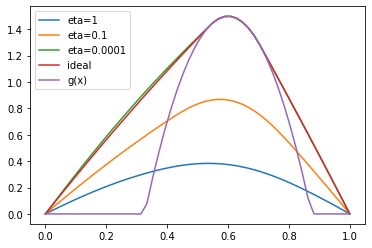

In [ ]:
n = 50
setting=[ 1, 0.1,10**(-4)]

#Initialisation
h=1/(n+1)
gn=np.array([g(i*h) for i in range(1,n+1)])
u=np.ones(n)
tol=10**(-5)
iterMax=1000
rho=2*tol
eta=0.1

#Affichage des nombres d'itération pour chaque valeur de n: En cas de convergence, on aurait iter<iterMax
for eta in setting:
    
      vals=[]
      start=time.time()
      iter,s=pénalisation(u,gn,eta,rho,tol,iterMax)
      end=time.time()
      temps_calcul=end-start

      sol_th=sol_th_ss_contraintes(n)
      sol_app=s[-1]
      erreur=np.linalg.norm(sol_th-sol_app)
      vals.append(["n={}  ".format(n),"{}/{} itérations".format(iter,iterMax),np.round(temps_calcul,5),erreur,(iter<iterMax)])
      vals.insert(0,["dim n","Nombre d'itérations","temps de calcul","erreur","Convergence?"])
      vals=[[" dim n","nbre itérations"],vals]
      M=np.array(vals)
      print("=======================================================================")
      print("                                eta={}                                   ".format(eta))
      print("=======================================================================")
      print(M)
      X=([i*h for i in range(0,n+2)])
      Y=[0]+list(s[-1])+[0]

      plt.plot(X,Y,label="eta={}".format(eta))
      plt.legend()
        #condition de bord   
Y=[0]+list(sol_th)+[0]
print(Y)
plt.plot(X, Y,label="ideal") 
G=[g(0)]+list(gn)+[g(1)]
plt.plot(X,G,label="g(x)")
plt.legend()  
plt.show()  



#####Méthode de Uzawa

In [ ]:
def grad_fixe_bis(tol,u0,rho,max_iter,Jf,DJf,store):

  k=0
  s=[]
  rk=rho
  taille=np.shape(u0)[0]
  uk=u0
  s.append(uk)
  while (rk>=tol)&(k<max_iter):
    k+=1
    dk=-DJf(uk)
    #print("dk=",dk)
    uk=uk+rho*dk
    rk=np.linalg.norm(rho*dk)
    s.append(uk)
  if store==0:
    s=s[-1]
  return s  



def minimiseur (Lambda,Jf,DJf,gn,u,tol,u0,rho,max_iter):
  Jf_new= lambda u:Jf(u)+(np.dot(Lambda,gn-u)).sum()
  #print(np.shape(DJf(u))[0])
  #print(np.shape(Lambda)[0])
  #DJf_new= lambda u:DJf(u)
  DJf_new= lambda u:DJf(u)-Lambda
  u_new=grad_fixe_bis(tol,u,rho,max_iter,Jf_new,DJf_new,0)
  return u_new

def uzawa(tol,u0,rho,max_iter,Lambda0,l=g,store=1):
  #Initialisation
  n=np.shape(Lambda0)[0]
  #print(n)
  uk=u0
  #print(uk)
  Lambdak=Lambda0
  h=1/(n+1)
  gn=[l(i*h) for i in range(1,n+1)]
  rk=2*tol
  k=0
  s=[]
  s.append(uk)
  #Boucle
  while (rk>=tol)&(k<max_iter):
      uk_new=minimiseur(Lambdak,Jn,nabla_Jn,gn,uk,tol,u0,rho,max_iter) # on minimise le lagrangien à lambda fixé sur chaque itération
      Lambdak_new=[max(Lambdak[i]+rho*gn[i]-rho*uk[i],0) for i in range(len(Lambdak))] #on chercher le argmax du lagrangien à x fixé 
      rk=np.linalg.norm(uk_new-uk)
      uk=uk_new
      Lambdak=Lambdak_new
      s.append(uk)
      k+=1
      
  #Output
  iter=k
  #print("rk=",rk)
  if store==0:
    s=s[-1]
  return(iter,s)

In [ ]:
#Test de la méthode d'uzawa +effet du pas!

n=10
u0=np.zeros(n)
Lambda0=np.zeros(n)
max_iter=10000
#tol=10**(-5)
A=constructeur_A(n)
alpha=min(np.linalg.eigvals(A))
M=max(np.linalg.eigvals(A))
rho_max=2*alpha/M**2
print("rho_max=",rho_max)
l1=np.array([0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.99])
liste=l1*rho_max
#print(liste)
i=-1
vals=[]
sol_th=sol_th_ss_contraintes(n)
for rho in liste :
  #print("rho=",rho)
  tol=rho_max/100
  i+=1
  start=time.time()
  iter,s=uzawa(tol,u0,rho,max_iter,Lambda0,g)
  end=time.time()
  temps_calcul=end-start

  sol_app=s[-1]
  erreur=np.linalg.norm(sol_th-sol_app)
  vals.append(["n={}  ".format(n),l1[i],"{}/{} itérations".format(iter,max_iter),np.round(temps_calcul,5),erreur,(iter<max_iter)&(erreur<np.linalg.norm(sol_th-u0))])

vals.insert(0,["dim n","rho/rho_max","Nombre d'itérations","temps de calcul","erreur","Convergence?"])

M=np.array(vals)
print("==========================================================================================")
print("                              Performance de la méthode de UZAWA                          ")
print("==========================================================================================")
print(M)


rho_max= 8.718817184703995e-05


<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                              Performance de la méthode de UZAWA                          
[['dim n' 'rho/rho_max' "Nombre d'itérations" 'temps de calcul' 'erreur'
  'Convergence?']
 ['n=10  ' '0.1' '10000/10000 itérations' '1.99015' '2.82520319806441'
  'False']
 ['n=10  ' '0.15' '10000/10000 itérations' '2.03633' '2.812809692467934'
  'False']
 ['n=10  ' '0.2' '10000/10000 itérations' '2.19158' '2.802114133940069'
  'False']
 ['n=10  ' '0.25' '10000/10000 itérations' '2.39748' '2.792117637565024'
  'False']
 ['n=10  ' '0.5' '10000/10000 itérations' '3.90625' '2.745637803986569'
  'False']
 ['n=10  ' '0.75' '10000/10000 itérations' '5.53622' '2.7013199842953663'
  'False']
 ['n=10  ' '0.9' '10000/10000 itérations' '5.84921' '2.67529929133532'
  'False']
 ['n=10  ' '0.99' '10000/10000 itérations' '6.37945' '2.659858525578009'
  'False']]


BROUILLON

In [ ]:
#brouillon
'''
for n in [2,5,20,50,100]:
    A=constructeur_A(n)
    L=np.linalg.eigvals(A)
    a=min(L)
    
    b=max(L)
    print("a=",a,"b=",b)
    rho_lim=(2*a)/(b**2)
    rho_opt=2/(a+b)
    print("n=",n,rho_lim,rho_opt)
    print(np.pi**2)
'''

'\nfor n in [2,5,20,50,100]:\n    A=constructeur_A(n)\n    L=np.linalg.eigvals(A)\n    a=min(L)\n    \n    b=max(L)\n    print("a=",a,"b=",b)\n    rho_lim=(2*a)/(b**2)\n    rho_opt=2/(a+b)\n    print("n=",n,rho_lim,rho_opt)\n    print(np.pi**2)\n'

In [ ]:
'''
x=np.zeros(5)
y=x
print(x)
np.dot(x,y)
np.shape(x)[0]
nabla_Jn(x)
x=np.zeros(5)
np.reshape(x,(5,1))
x=np.linspace(0,1,5)
'''


'\nx=np.zeros(5)\ny=x\nprint(x)\nnp.dot(x,y)\nnp.shape(x)[0]\nnabla_Jn(x)\nx=np.zeros(5)\nnp.reshape(x,(5,1))\nx=np.linspace(0,1,5)\n'

In [ ]:
'''
x = np. linspace (0 , 1 , n + 2) 
x=x[1:-1]
x=[1,2,3,4,5]
x=x[1:-1]
x
'''

'\nx = np. linspace (0 , 1 , n + 2) \nx=x[1:-1]\nx=[1,2,3,4,5]\nx=x[1:-1]\nx\n'

<ipython-input-17-1d54dae7d091>:10: OptimizeWarning: Unknown solver options: disp , maxiter 
  res = minimize (Jf , u, method = 'SLSQP', jac = DJf , constraints =const , tol = 10**(-8) , options = {'disp ': True , 'maxiter ': 5000})


                              pas=0.1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '54/1000 itérations' '0.03703304226589765' '0.00483' 'True']
 ['n=5  ' '389/1000 itérations' 'nan' '0.01163' 'False']
 ['n=20  ' '161/1000 itérations' 'nan' '0.0061' 'False']
 ['n=50  ' '115/1000 itérations' 'nan' '0.00894' 'False']
 ['n=100  ' '95/1000 itérations' 'nan' '0.01494' 'False']]


<ipython-input-24-d1266ad7c8b8>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()
<ipython-input-21-3b9ebfda5ee9>:12: RuntimeWarning: invalid value encountered in add
  uk_new=projection_k_n(uk+rho*wk,gn)


                              pas=0.5                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '473/1000 itérations' 'nan' '0.02086' 'False']
 ['n=5  ' '208/1000 itérations' 'nan' '0.01081' 'False']
 ['n=20  ' '119/1000 itérations' 'nan' '0.0072' 'False']
 ['n=50  ' '92/1000 itérations' 'nan' '0.01019' 'False']
 ['n=100  ' '79/1000 itérations' 'nan' '0.01209' 'False']]
                              pas=1                                     
[['dim n' "Nombre d'itérations" 'erreur' 'temps de calcul' 'Convergence?']
 ['n=2  ' '324/1000 itérations' 'nan' '0.01497' 'False']
 ['n=5  ' '174/1000 itérations' 'nan' '0.00799' 'False']
 ['n=20  ' '107/1000 itérations' 'nan' '0.00653' 'False']
 ['n=50  ' '85/1000 itérations' 'nan' '0.00775' 'False']
 ['n=100  ' '73/1000 itérations' 'nan' '0.01112' 'False']]


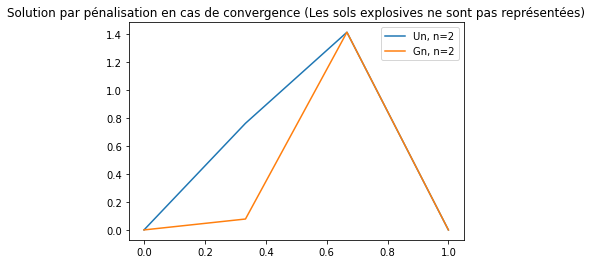

In [ ]:
list_pas=[0.1,0.5,1]
test_cvg_fct_pas(list_pas,Id)